<a href="https://colab.research.google.com/github/Renita09/Diabets-Prediction/blob/RENITA/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary libraries

In [ ]:
#importing basic libraries and visualization laibraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from scipy import stats
from scipy.stats import norm



In [ ]:

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

**Importing the data and reading the data**

In [ ]:
#loading the dataset 
Diabetes_dataset=pd.read_csv('/content/diabetes.csv')


In [ ]:
#displaying first 5 records
Diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# getting 10 random samples
Diabetes_dataset.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
501,3,84,72,32,0,37.2,0.267,28,0
21,8,99,84,0,0,35.4,0.388,50,0
57,0,100,88,60,110,46.8,0.962,31,0
17,7,107,74,0,0,29.6,0.254,31,1
182,1,0,74,20,23,27.7,0.299,21,0
102,0,125,96,0,0,22.5,0.262,21,0
137,0,93,60,25,92,28.7,0.532,22,0
421,2,94,68,18,76,26.0,0.561,21,0
323,13,152,90,33,29,26.8,0.731,43,1
50,1,103,80,11,82,19.4,0.491,22,0


In [ ]:
#displaying last 5 records
Diabetes_dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
#displaying selected records
Diabetes_dataset[10:20]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
10,4,110,92,0,0,37.6,0.191,30,0
11,10,168,74,0,0,38.0,0.537,34,1
12,10,139,80,0,0,27.1,1.441,57,0
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
15,7,100,0,0,0,30.0,0.484,32,1
16,0,118,84,47,230,45.8,0.551,31,1
17,7,107,74,0,0,29.6,0.254,31,1
18,1,103,30,38,83,43.3,0.183,33,0
19,1,115,70,30,96,34.6,0.529,32,1


**EXPLORATORY DATA ANALYSIS**

EDA aims to perform initial investigations on data before formal modeling and graphical representations and visualisations, in order to discover patterns, look over assumptions, and test hypothesis. The summarised information on main characteristics and hidden trends in data can help the doctor to identify concern areas and problems, and the resolution of these can boost their accuracy in diagosing diabetes.

In [ ]:
#displaying column names
Diabetes_dataset.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
#counting rows and columns
Diabetes_dataset.shape

(768, 9)

In [ ]:
# displaying the number of entries, the names of the column attributes, the data type and the memory space used
Diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The dataset contains 768 rows of records and 9 columns of attributes. The data types of the attributes consist of 1 quantitative discrete binary, 6 quantitative discrete numerical integers, and 2 quantitative continuous numerical float with 64 digit placings.

The memory space usage is at least 54.1 kilobytes (KB).

In [ ]:
# summary statistics of the attributes, including measures of central tendency and measures of dispersion
Diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Descriptive statistics of the data set accessed.
Diabetes_dataset.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T


,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


**Checking for null values **

In [ ]:
Diabetes_dataset.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
Diabetes_dataset.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
Diabetes_dataset.isnull().values.any()

False

There are no null values in our data.

In [ ]:
# checking for duplicate rows
duplicated_rows = Diabetes_dataset[Diabetes_dataset.duplicated()]
duplicated_rows.shape

(0, 9)

There are no duplications in the dataset.

Correlation matrix

In [ ]:
# Access to the correlation of the data set was provided.

In [ ]:
Diabetes_dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000




From the correlation matrix we found that

Glucose, BMI, Age, Pregnancies are the top 4 features that are related to the outcome.

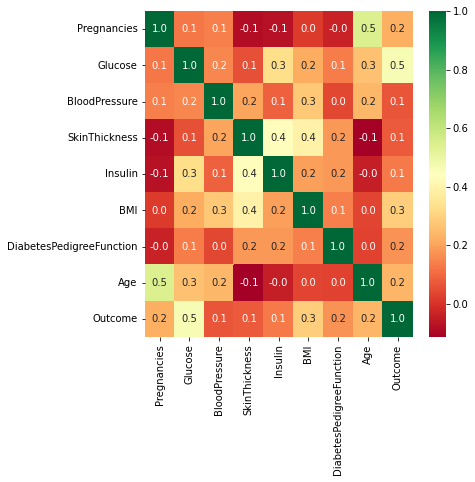

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(Diabetes_dataset.corr(), annot=True, fmt='.1f',cmap='RdYlGn')
plt.show()

**Count plot specifying the number of people suffering by diabetes**

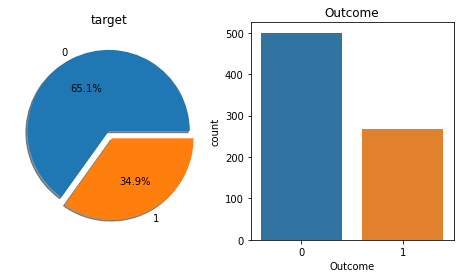

In [ ]:
# The distribution of the outcome variable in the data was examined and visualized.
f,ax=plt.subplots(1,2,figsize=(8,4))
Diabetes_dataset['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=Diabetes_dataset,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [ ]:
# The distribution of the Outcome variable was examined.
Diabetes_dataset["Outcome"].value_counts()*100/len(Diabetes_dataset)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [ ]:
# The classes of the outcome variable were examined.
Diabetes_dataset.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
Diabetes_dataset.groupby("Outcome").agg({"Pregnancies":"mean"})


,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [ ]:
Diabetes_dataset.groupby("Outcome").agg({"Age":"mean"})


,Age
Outcome,
0,31.190000
1,37.067164


In [ ]:
Diabetes_dataset.groupby("Outcome").agg({"Age":"max"})


,Age
Outcome,
0,81
1,70


In [ ]:
Diabetes_dataset.groupby("Outcome").agg({"Insulin": "mean"})


,Insulin
Outcome,
0,68.792000
1,100.335821


In [ ]:
Diabetes_dataset.groupby("Outcome").agg({"Insulin": "max"})


,Insulin
Outcome,
0,744
1,846


In [ ]:
Diabetes_dataset.groupby("Outcome").agg({"Glucose": "mean"})


,Glucose
Outcome,
0,109.980000
1,141.257463


In [ ]:
Diabetes_dataset.groupby("Outcome").agg({"Glucose": "max"})


,Glucose
Outcome,
0,197
1,199


In [ ]:
Diabetes_dataset.groupby("Outcome").agg({"BMI": "mean"})


,BMI
Outcome,
0,30.304200
1,35.142537


DATA PRE PROCESSING

In [ ]:
Diabetes_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = Diabetes_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


In [ ]:
Diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
# Now, we can look at where are missing values
Diabetes_dataset.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

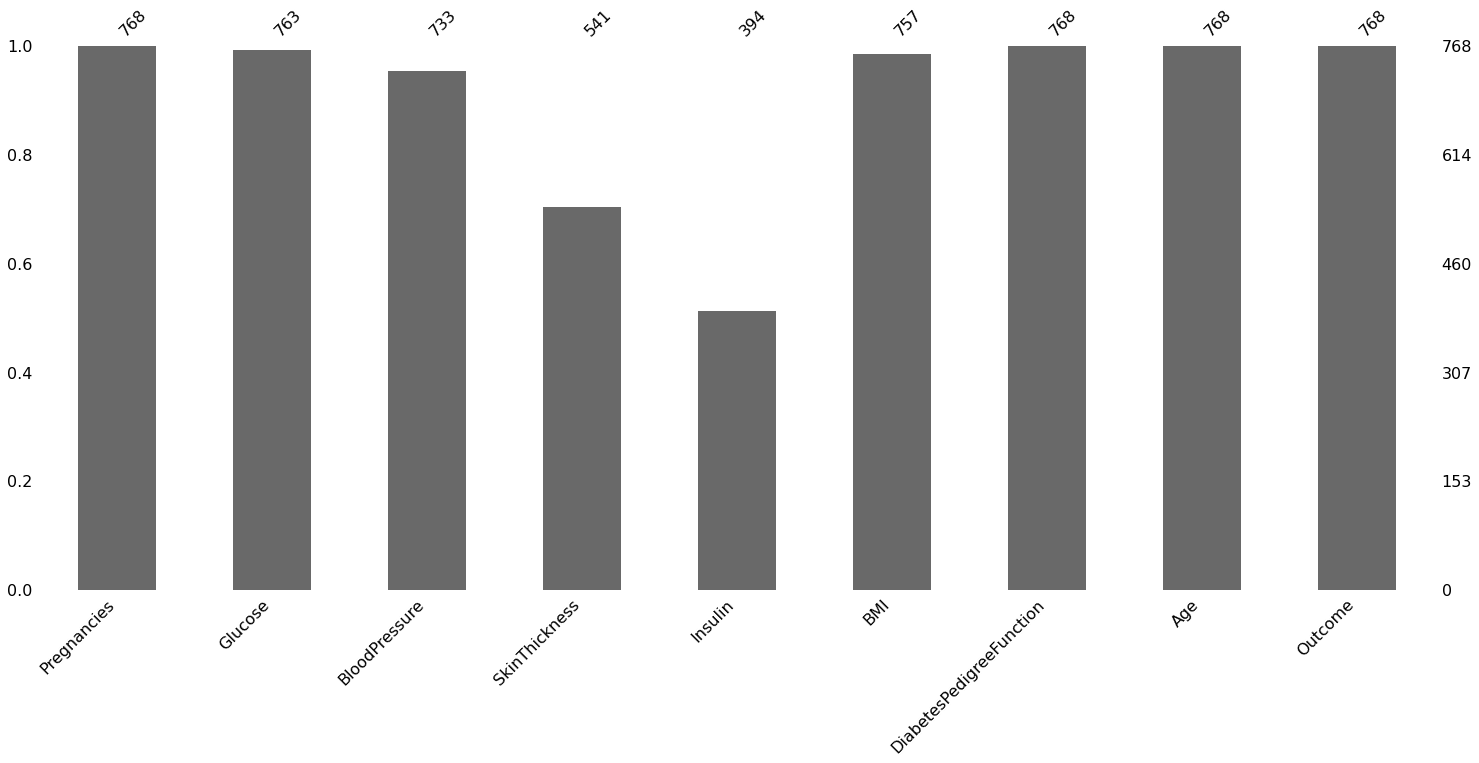

In [ ]:
# Have been visualized using the missingno library for the visualization of missing observations.
# Plotting 
import missingno as msno
msno.bar(Diabetes_dataset);

In [ ]:
# The missing values ​​will be filled with the median values ​​of each variable.
def median_target(var):   
    temp = Diabetes_dataset[Diabetes_dataset[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [ ]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = Diabetes_dataset.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    Diabetes_dataset.loc[(Diabetes_dataset['Outcome'] == 0 ) & (Diabetes_dataset[i].isnull()), i] = median_target(i)[i][0]
    Diabetes_dataset.loc[(Diabetes_dataset['Outcome'] == 1 ) & (Diabetes_dataset[i].isnull()), i] = median_target(i)[i][1]

In [ ]:
Diabetes_dataset[:10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,70.0,27.0,102.5,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,32.0,169.5,34.3,0.232,54,1


In [ ]:
# Missing values were filled.
Diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

FEATURE SCALING ON THE  DATA

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. 

In [ ]:
#Here Features - pregnancies,glucose,bloodpressure,skin thickness,insulin,BMI,diabetes pedigree function,age,outcome  columns are 
#taken using slicing...To handle values with varying magnitude...
from sklearn import preprocessing
x = Diabetes_dataset.iloc[:, 1:9].values
print ("\nOriginal data values : \n",  x)


Original data values : 
 [[148.     72.     35.    ...   0.627  50.      1.   ]
 [ 85.     66.     29.    ...   0.351  31.      0.   ]
 [183.     64.     32.    ...   0.672  32.      1.   ]
 ...
 [121.     72.     23.    ...   0.245  30.      0.   ]
 [126.     60.     32.    ...   0.349  47.      1.   ]
 [ 93.     70.     31.    ...   0.315  23.      0.   ]]


In [ ]:
""" MIN MAX SCALER """
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))

In [ ]:
# Scaled feature
x_after_min_max_scaler = min_max_scaler.fit_transform(x) 
print ("\nAfter min max Scaling : \n", x_after_min_max_scaler)


After min max Scaling : 
 [[0.67096774 0.48979592 0.30434783 ... 0.23441503 0.48333333 1.        ]
 [0.26451613 0.42857143 0.23913043 ... 0.11656704 0.16666667 0.        ]
 [0.89677419 0.40816327 0.27173913 ... 0.25362938 0.18333333 1.        ]
 ...
 [0.49677419 0.48979592 0.17391304 ... 0.07130658 0.15       0.        ]
 [0.52903226 0.36734694 0.27173913 ... 0.11571307 0.43333333 1.        ]
 [0.31612903 0.46938776 0.26086957 ... 0.10119556 0.03333333 0.        ]]


Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

In [ ]:
""" Standardisation """
  
Standardisation = preprocessing.StandardScaler()
  
# Scaled feature
x_after_Standardisation = Standardisation.fit_transform(x)
  
print ("\nAfter Standardisation : \n", x_after_Standardisation)


After Standardisation : 
 [[ 0.86462486 -0.03218035  0.66518138 ...  0.46849198  1.4259954
   1.36589591]
 [-1.20472661 -0.52812374 -0.01011181 ... -0.36506078 -0.19067191
  -0.73212021]
 [ 2.01426457 -0.69343821  0.32753478 ...  0.60439732 -0.10558415
   1.36589591]
 ...
 [-0.02224005 -0.03218035 -0.685405   ... -0.68519336 -0.27575966
  -0.73212021]
 [ 0.14199419 -1.02406713  0.32753478 ... -0.37110101  1.17073215
   1.36589591]
 [-0.94195182 -0.19749482  0.21498592 ... -0.47378505 -0.87137393
  -0.73212021]]
